# Model 4: PCA, outliers removed

Instead of selecting features by hand based on the coefficients with diagnosis in the correlation matrix, this model (logistic regression) will use PCA to reduce the feature space.

I will first remove outliers in the dataset to see what effect this has on the model (compared to model 3 which used PCA but left the outliers in).

Need to first create a subset of data_plus_encoded_diagnosis with the outliers removed before running the model.

In [1]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in the csv file
data_all_features = pd.read_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/data_with_encoded_diagnosis.csv")

In [3]:
data_all_features.head()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# removing Unnamed: 0 and id
data_all_features = data_all_features.drop("Unnamed: 0", axis=1)
data_all_features = data_all_features.drop("id", axis=1)
data_all_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Now to remove outliers

In [5]:
# identifying outliers using IQR
Q1 = data_all_features.quantile(0.25)
Q3 = data_all_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [6]:
# visualising outliers
visualise = (data_all_features < (Q1 - 1.5 * IQR)) |(data_all_features > (Q3 + 1.5 * IQR))
visualise.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,False,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,True,True,...,False,False,False,True,True,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# counting outliers: False = true value and True = outlier
visualise[visualise == True].count()

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
one_hot_diagnosis           0
dtype: int64

Can see we have quite a few outliers for each column, but some of these records might overlap (so might not be as many as it looks).

In [8]:
# creating a subset of the data without outliers
all_features_outliers_removed = data_all_features[~((data_all_features < (Q1 - 1.5 * IQR)) |(data_all_features > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
all_features_outliers_removed.shape

(398, 31)

In [10]:
all_features_outliers_removed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,1
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,1
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,1


In [11]:
all_features_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 6 to 566
Data columns (total 31 columns):
radius_mean                398 non-null float64
texture_mean               398 non-null float64
perimeter_mean             398 non-null float64
area_mean                  398 non-null float64
smoothness_mean            398 non-null float64
compactness_mean           398 non-null float64
concavity_mean             398 non-null float64
concave points_mean        398 non-null float64
symmetry_mean              398 non-null float64
fractal_dimension_mean     398 non-null float64
radius_se                  398 non-null float64
texture_se                 398 non-null float64
perimeter_se               398 non-null float64
area_se                    398 non-null float64
smoothness_se              398 non-null float64
compactness_se             398 non-null float64
concavity_se               398 non-null float64
concave points_se          398 non-null float64
symmetry_se                398 

Looks like it has removed 171 records. That's a lot considering our dataset is small.

In [12]:
# save new subset of the data to csv
all_features_outliers_removed.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/all_features_outliers_removed.csv")

In [13]:
# count benign
all_features_outliers_removed.loc[all_features_outliers_removed.one_hot_diagnosis == 0, "one_hot_diagnosis"].count()

300

In [14]:
# count malignant
all_features_outliers_removed.loc[all_features_outliers_removed.one_hot_diagnosis == 1, "one_hot_diagnosis"].count()

98

Removing the outliers has massively reduced the number of malignant records (114 been removed, more than half the original number). There is now a prominent class imbalance in the data, almost 3:1 (benign:malignant). This is likely to affect the predictive power of the model.

### Now to split the data

In [15]:
# splitting the target from predictors

# creating x data containing features only
x_data = all_features_outliers_removed.drop("one_hot_diagnosis", axis=1)
# creating y data containing target only
y_data = all_features_outliers_removed["one_hot_diagnosis"]

In [16]:
# check x data
x_data.head()

# contains only features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [17]:
# check y data
y_data.head()

# contains only target

6     1
7     1
10    1
11    1
13    1
Name: one_hot_diagnosis, dtype: int64

In [18]:
# importing split function
from sklearn.model_selection import train_test_split
# splitting the data using stratified split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=0, stratify=y_data)

In [19]:
# checking length of train set
# should be around 318 as this is 80% of 398
len(x_train)

# correct

318

In [20]:
# checking length of train set
# should be around 80 as this is 20% of 398
len(x_test)

# correct

80

In [21]:
# checking length of train set
# should be around 318 as this is 80% of 398
len(y_train)

# correct

318

In [22]:
# checking length of train set
# should be around 80 as this is 20% of 398
len(y_test)

# correct

80

### Now to scale the data

In [23]:
# importing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
# fit on training set only
# fit on x_train only as it contains the features
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# apply transform to both the training and test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
# checking transformation worked
print(x_train)

[[-0.59968175 -0.06379983 -0.54058836 ...  0.36528136  1.37180387
   0.3595818 ]
 [ 0.33071991  2.27441799  0.35788285 ... -0.26509898 -2.05835715
  -0.10541952]
 [-0.38804533 -0.87848415 -0.46448673 ... -1.0961002   0.24283249
  -0.93326897]
 ...
 [-0.77537992  0.58105603 -0.7476556  ... -0.68229469 -0.07355263
   0.7567534 ]
 [-1.09483113  1.62710085 -1.08981797 ... -0.68049987  1.39911769
   0.18142664]
 [-1.57959835 -0.07118368 -1.57297485 ... -0.89667586 -0.77460744
   0.17243715]]


### Now for PCA

In [27]:
# import PCA
from sklearn.decomposition import PCA

In [28]:
# tell PCA to include 95% variance
pca = PCA(.95)

In [29]:
# now we fit PCA to train set
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
# checking how many components PCA calculated to encompass 95% variance
pca.n_components_

10

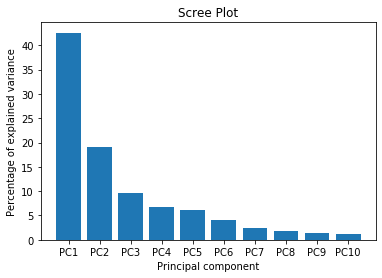

In [31]:
# can graphically represent % variation in each PC in a scree plot

# calculate % variation of each PC
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

# create labels for scree plot
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

# now use matplotlib to create bar plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component")
plt.title("Scree Plot")
plt.show()

In [32]:
# get exact figures for % variance captured in each PC
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.42619529 0.19132878 0.09729039 0.06666511 0.06153282 0.03988691
 0.02485973 0.01875911 0.01527045 0.01114044]


This means that PC1 contains ~ 43% of the variance, PC2 ~19%, PC3 ~10% etc.

So, dropping down to 3D (instead of the original 32D), would capture ~ 72% of the variance in our data.

If we want to capture 95%, PCA suggests that we can reduce the feature space from 32D to 10D. 

**This is only slightly different from the PCA results on the dataset with the outliers left in. With the outliers left in, PC1 explained approx. 45% of the variance instead of 42%. Everything else is basically the same.**

However, principial components are combinations of features, so need to see a table to understand which features are most important to each PC.

In [33]:
# displaying the eigenvectors for each feature
principal_components = pd.DataFrame(data=pca.components_, index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"], columns=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"])
principal_components.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.223591,0.098668,0.231978,0.224280,0.122184,0.228352,0.260461,0.263581,0.100280,0.012088,...,0.239299,0.107220,0.247713,0.238514,0.129163,0.217118,0.240615,0.254998,0.104808,0.122174
PC2,0.232411,0.043555,0.213746,0.230428,-0.235597,-0.185499,-0.061981,-0.003893,-0.149938,-0.366761,...,0.206421,0.027245,0.183915,0.203162,-0.214242,-0.156994,-0.076144,-0.027613,-0.117476,-0.281589
PC3,-0.022654,0.256901,-0.027089,-0.005331,-0.103756,-0.090123,-0.034115,-0.047315,-0.006526,-0.077905,...,-0.034135,0.194997,-0.041964,-0.017074,-0.189374,-0.187856,-0.141571,-0.142326,-0.204770,-0.216662
PC4,-0.008616,0.406529,-0.005585,-0.024390,-0.245143,0.006310,0.047272,-0.071755,-0.316227,-0.033798,...,-0.032737,0.418352,-0.012826,-0.045080,-0.122081,0.167103,0.172566,0.042980,-0.168248,0.132179
PC5,0.047970,-0.360533,0.049846,0.038128,-0.173920,0.041856,0.032141,-0.004422,-0.280426,-0.037296,...,-0.026170,-0.449880,-0.008653,-0.033982,-0.272358,0.034895,0.032380,-0.008791,-0.368493,-0.035623


The eigenvector with the largest absolute value has the greatest effect on that PC.

For PC1, the following features had the greatest effect:
* Concave points mean (0.263)
* Concavity mean (0.26)
* Concave points worst (0.254)
* Perimeter worst (0.247)

This is different to the dataset that kept the outliers in, the results for which were:
* Concave points mean (0.261)
* Concavity mean (0.258)
* Concave points worst (0.248)
* Compactness mean (0.241)

**Seems that removing outliers has meant that the features of concave points mean, concavity mean and concave points worst have a greater effect on PC1, plus perimeter has a greater effect than it did before / than compactness mean.**

In [34]:
# now we have investigated, can apply PCA transformation to train and test sets
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

### Now for logistic regression

In [35]:
# import the model we want to use
from sklearn.linear_model import LogisticRegression
# setting the solver cos it Jupyter didn't like it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [36]:
# training the model on the data - model is learning the relationship between features and classes
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# now to apply it to the test data
# model will predict the class based on what it has learned in the training
predictions = logisticRegr.predict(x_test)

In [38]:
print(predictions)
# can see it has predicted classes for the test data

[1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1]


### Assessing model performance

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

Of the metrics used to assess model performance (accuracy, precision, recall), **recall seems the most appropriate for this data**.

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

There is a 'tug of war' between precision (which aims to minimise false positives) and recall (which aims to minimise false negatives). The F1 score is the harmonic mean of both. A model with perfect precision and recall would have an F1 score of 1.

Also, in this dataset with outliers removed, we have 300:98 class distribution (benign:malignant). This is a prominent class imbalance and so accuracy would be misleading.

In [39]:
# let's look at the other metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.89      0.85      0.87        20

    accuracy                           0.94        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



In [40]:
# creating a confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[58,  2],
       [ 3, 17]], dtype=int64)

Text(0.5, 15.0, 'Predicted class')

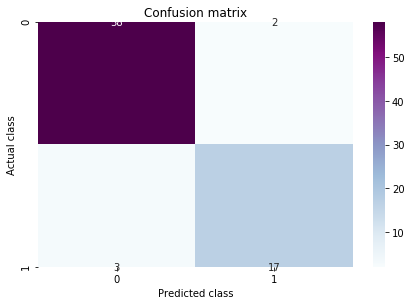

In [41]:
# making confusion matrix a heatmap

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

Predicted label 0 / actual label 0 = true negative  
Predicted label 0 / actual label 1 = false negative  
Predicted label 1 / actual label 1 = true positive  
Predicted label 1 / actual label 0 = false positive  

So this matrix is saying there are:
* 58 true negatives
* 3 false negatives
* 2 false positives
* 17 true positives

In [42]:
# try looking at the metrics for class 1 separately
# should be the same as classification report above, just makes it easier to read
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9375
Precision: 0.8947368421052632
Recall: 0.85


This model has the worst recall of all.

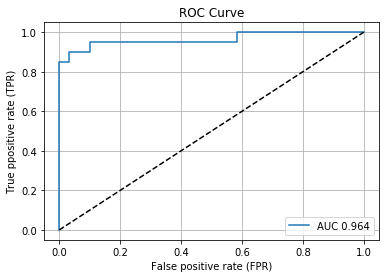

In [43]:
# attempting to plot an ROC curve

# first need to predict probability
# y_pred_proba is the predicted probability for a class in y_test dataset
# .predict_proba only gives the output of 1 in a binary classification (which is malignant, which is what we want)
# [:,1] also only gives the output for class 1
y_pred_proba = logisticRegr.predict_proba(x_test)[:,1]

# then this is plotting the ROC curve using y_test data (classes) and the predicted probability of getting class 1
# fpr is false positive rate on the x axis
# tpr is true positive rate on the y axis
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# calculating the AUC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting it on a graph

# plots x and y axes
plt.plot(fpr,tpr)
# plots legend as auc score
plt.legend(["AUC %.3f"%auc])
# plots labels / title
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True ppositive rate (TPR)")
plt.title("ROC Curve")
# adds a grid
plt.grid()
# adds the line for an AUC of 0.5, i.e. a useless classfier
plt.plot([0, 1], [0, 1], 'k--')
# shows plot
plt.show()

So to summarise

* This model has the lowest recall of all (0.85)
* Also has the lowest F1 score so far (0.87)
* The AUC score is 0.964, which is second lowest (after Model 2)

**Likely that model performance has been reduced by removing so many records / outliers.**